In [9]:
import pandas as pd  # Para manipulação de dados
from sklearn.model_selection import train_test_split  # Para dividir os dados em treino e teste
from sklearn.linear_model import LogisticRegression  # Modelo de Regressão Logística
from sklearn.metrics import classification_report, confusion_matrix  # Para avaliar o desempenho do modelo
import seaborn as sns  # Para visualização da matriz de confusão
import matplotlib.pyplot as plt  # Para exibir gráficos


data = pd.read_csv('data/titanic_processed.csv')

## Preparando os dados para o modelo de Regressão Logística

### Passo 1: Dividindo os dados
A variável 'Survived' é o que estamos tentando prever, então será nossa variável alvo (y).<br><br>
As colunas restantes relevantes para previsão serão usadas como variáveis de entrada (X).

In [10]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeCategory,Class_1,Class_2,Class_3,Sex_bin,AgeCategory_bin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Maior de idade,False,False,True,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Maior de idade,True,False,False,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Maior de idade,False,False,True,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Maior de idade,True,False,False,1,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Maior de idade,False,False,True,0,1


In [17]:
# Salvando as colunas em 2 variáveis
X = data[['Sex_bin', 'SibSp', 'Parch', 'Fare', 'Class_1', 'Class_2', 'Class_3', 'AgeCategory_bin', 'Age']]
y = data['Survived']


## Passo 2: Dividir os dados em conjuntos de treino e teste

In [12]:
# Dividimos os dados em 70% para treino e 30% para teste. 
# Isso ajuda a verificar a capacidade de generalização do modelo.

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3,  # 30% para dados de teste  
                                                    random_state=42  # Para garantir que sempre tenhamos o mesmo resultado
                                                    )


## Passo 3: Treinar o modelo de Regressão Logística

In [13]:


# Inicializamos o modelo de Regressão Logística e o ajustamos aos dados de treino.
model = LogisticRegression(max_iter=100, penalty='l2', solver='liblinear', C=2.0)

# Enviamos os dados de treino para o modelo aprender o padrão
model.fit(X_train, y_train)


LogisticRegression(C=2.0, solver='liblinear')

## Passo 4: Realizar previsões com o modelo treinado

In [14]:
# Usamos o modelo treinado para prever os valores de 'Survived' no conjunto de teste.
y_pred = model.predict(X_test)




## Passo 5: Avaliar o desempenho do modelo

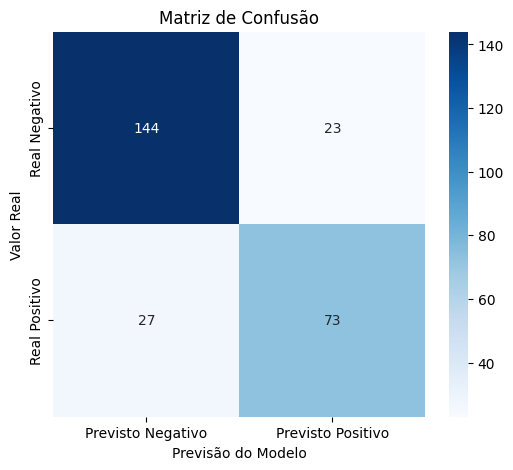

Relatório de Desempenho do Modelo:
                 precision    recall  f1-score   support

Não Sobreviveu       0.84      0.86      0.85       167
    Sobreviveu       0.76      0.73      0.74       100

      accuracy                           0.81       267
     macro avg       0.80      0.80      0.80       267
  weighted avg       0.81      0.81      0.81       267



In [15]:

# Calculamos a matriz de confusão para entender o número de acertos e erros do modelo.
conf_matrix = confusion_matrix(y_test, y_pred)

# Exibindo a matriz de confusão
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Previsto Negativo', 'Previsto Positivo'], yticklabels=['Real Negativo', 'Real Positivo'])
plt.xlabel('Previsão do Modelo')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusão')
plt.show()

# Exibindo o relatório de classificação com precisão, recall e F1-score
report = classification_report(y_test, y_pred, target_names=['Não Sobreviveu', 'Sobreviveu'])
print("Relatório de Desempenho do Modelo:\n", report)


Macro avg: Use-a quando você deseja que o modelo tenha um desempenho consistente em todas as classes, independentemente da frequência de cada classe. <br><br>
Weighted avg: Use-a quando quer uma visão geral do desempenho do modelo levando em conta o tamanho das classes, sendo mais representativa do desempenho global em conjuntos de dados desbalanceados

In [16]:
"""


Segundo modelo (sem idade).
Relatório de Desempenho do Modelo:
                 precision    recall  f1-score   support

Não Sobreviveu       0.84      0.86      0.85       167
    Sobreviveu       0.76      0.72      0.74       100

      accuracy                           0.81       267
     macro avg       0.80      0.79      0.79       267
  weighted avg       0.81      0.81      0.81       267
  
"""


'\n\n\nSegundo modelo (sem idade).\nRelatório de Desempenho do Modelo:\n                 precision    recall  f1-score   support\n\nNão Sobreviveu       0.84      0.86      0.85       167\n    Sobreviveu       0.76      0.72      0.74       100\n\n      accuracy                           0.81       267\n     macro avg       0.80      0.79      0.79       267\n  weighted avg       0.81      0.81      0.81       267\n  \n'